In [1]:
#pip install pmdarima

Stock market
Stock markets are where individual and institutional investors come together to buy and sell shares in a public venue. Nowadays these exchanges exist as electronic marketplaces.

That supply and demand help determine the price for each security or the levels at which stock market participants — investors and traders — are willing to buy or sell.

The concept behind how the stock market works is pretty simple. Operating much like an auction house, the stock market enables buyers and sellers to negotiate prices and make trades.

Definition of ‘Stock’
A Stock or share (also known as a company’s “equity”) is a financial instrument that represents ownership in a company

 

Machine learning in the stock market
The stock market is very unpredictable, any geopolitical change can impact the share trend of stocks in the share market, recently we have seen how covid-19 has impacted the stock prices, which is why on financial data doing a  reliable trend analysis is very difficult. The most efficient way to solve this kind of issue is with the help of Machine learning and Deep learning.

In this, we will be solving this problem with ARIMA Model.


In [2]:
import warnings                                  
warnings.filterwarnings('ignore')                # `do-not-disturb` mode

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
%matplotlib inline

import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.arima import auto_arima

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook
import math

In [4]:
# Loading ads dataset.

RIL = pd.read_csv("C://Users//vbhak//Downloads//RILO - Copy.csv",index_col=['Date'], parse_dates=['Date'])
RIL.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2016-01-01,RELIANCE,EQ,1014.60,1009.80,1018.9,1008.20,1013.6,1015.35,1015.52,1238135,1.257353e+09,30701,529539,42.77
2016-01-04,RELIANCE,EQ,1015.35,1005.00,1013.8,986.70,993.2,995.30,998.91,6896571,6.889070e+09,66235,4974602,72.13
2016-01-05,RELIANCE,EQ,995.30,1000.30,1010.0,997.00,1005.0,1005.15,1003.41,3416459,3.428125e+09,59935,1987804,58.18
2016-01-06,RELIANCE,EQ,1005.15,1007.60,1038.4,1000.40,1029.1,1032.20,1028.15,6116855,6.289073e+09,160947,2912662,47.62
2016-01-07,RELIANCE,EQ,1032.20,1021.05,1028.0,1008.05,1018.9,1013.25,1016.73,4512219,4.587700e+09,105075,2474491,54.84


In [5]:
#RIL['Date'] = pd.to_datetime(RIL['Date'])

In [6]:
#RIL.head()

In [7]:
RIL.isnull().sum().sum()

0

In [8]:
RIL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1324 entries, 2016-01-01 to 2021-05-06
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  1324 non-null   object 
 1   Series                  1324 non-null   object 
 2   Prev Close              1324 non-null   float64
 3   Open Price              1324 non-null   float64
 4   High Price              1324 non-null   float64
 5   Low Price               1324 non-null   float64
 6   Last Price              1324 non-null   float64
 7   Close Price             1324 non-null   float64
 8   Average Price           1324 non-null   float64
 9   Total Traded Quantity   1324 non-null   int64  
 10  Turnover                1324 non-null   float64
 11  No. of Trades           1324 non-null   int64  
 12  Deliverable Qty         1324 non-null   int64  
 13  % Dly Qt to Traded Qty  1324 non-null   float64
dtypes: float64(9), int64(3

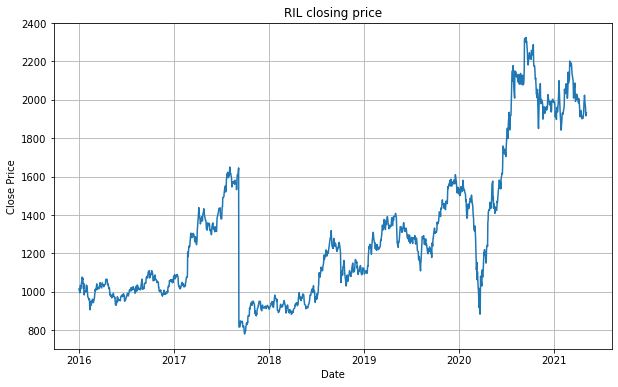

In [9]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(RIL['Close Price'])
plt.title('RIL closing price')
plt.show()

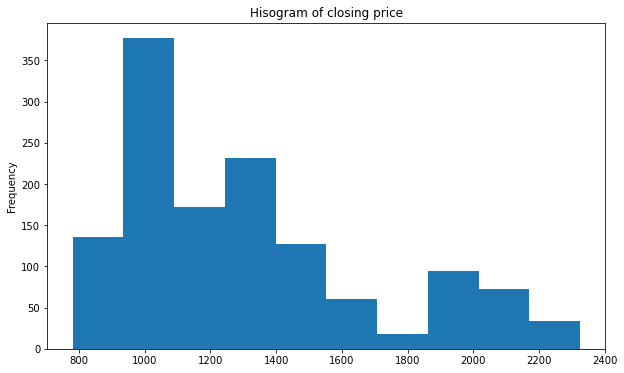

In [10]:
plt.figure(figsize=(10,6))
df_close = RIL['Close Price']
df_close.plot(style='k.',kind='hist')
plt.title('Hisogram of closing price')
plt.show()

<AxesSubplot:ylabel='Density'>

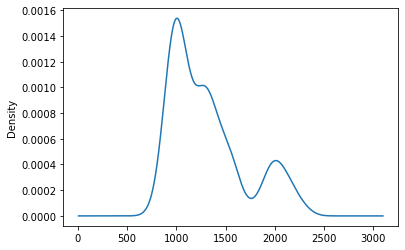

In [12]:
df_close.plot(kind='kde')



Testing For Stationarity:

To identify the nature of the data, we will be using the null hypothesis.

H0: The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.

H1: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0.

#Ho: It is non-stationary
#H1: It is stationary
If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear.

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    


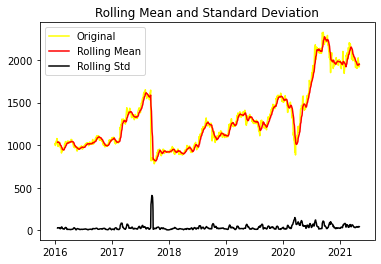

Results of dickey fuller test
Test Statistics                  -1.351750
p-value                           0.605177
No. of lags used                  0.000000
Number of observations used    1323.000000
critical value (1%)              -3.435302
critical value (5%)              -2.863727
critical value (10%)             -2.567934
dtype: float64


In [14]:
test_stationarity(df_close)

The increasing mean and standard deviation may be seen in the graph above, indicating that our series isn’t stationary.

We can’t rule out the Null hypothesis because the **p-value is bigger than 0.05**. however, the test statistics is less than the critical values.  we fail to reject the null hypothesis. As a result, It is non-stationary

<Figure size 432x288 with 0 Axes>

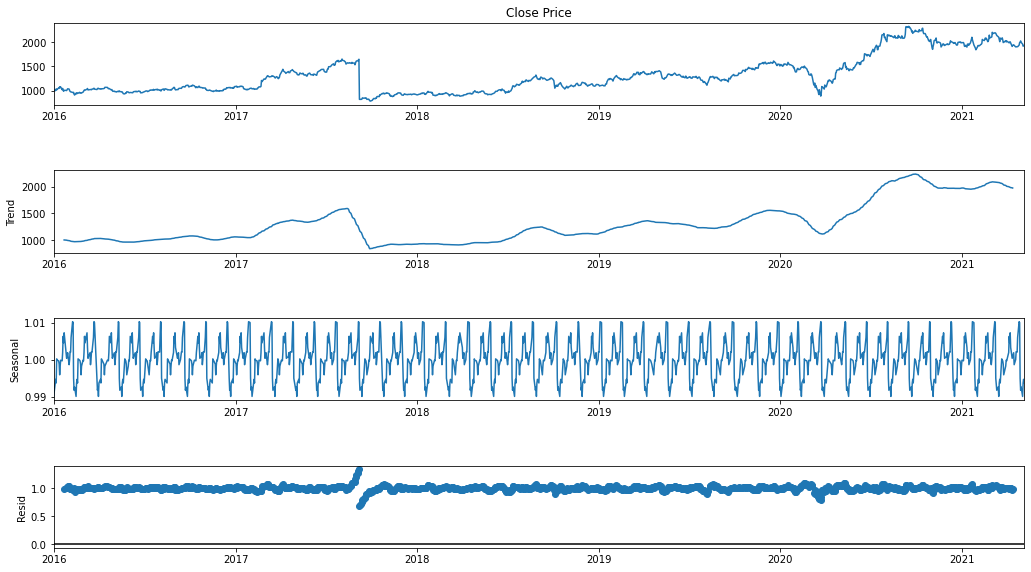

In [15]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

To reduce the magnitude of the values and the growing trend in the series, we first take a log of the series. We then calculate the rolling average of the series after obtaining the log of the series. A rolling average is computed by taking data from the previous 12 months and calculating a mean consumption value at each subsequent point in the series.

No handles with labels found to put in legend.


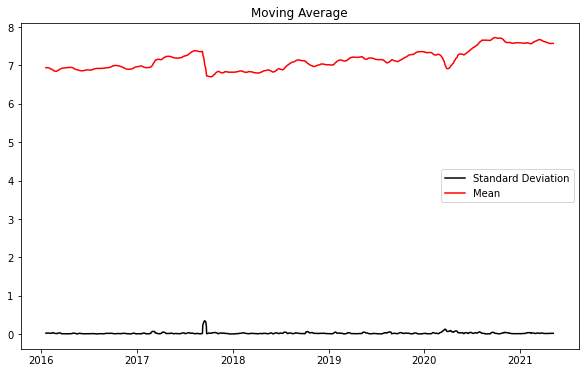

In [16]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()

Now we’ll develop an ARIMA model and train it using the stock’s closing price from the train data. So, let’s visualize the data by dividing it into training and test sets.

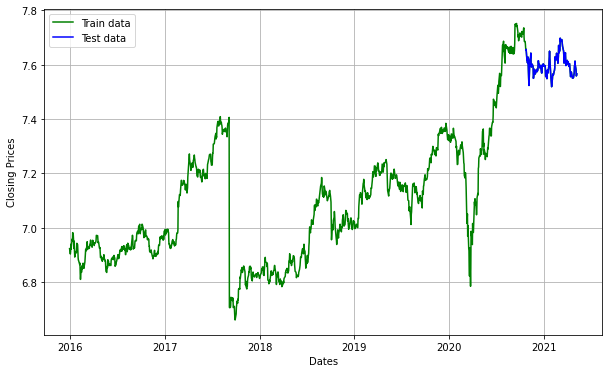

In [17]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5121.416, Time=0.49 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5120.124, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5120.089, Time=1.89 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5122.854, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5118.359, Time=1.72 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.684 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1188
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2562.427
Date:                Sun, 26 Dec 2021   AIC                          -5122.854
Time:                        16:05:30   BIC                          -5117.775
Sample:                             0   HQIC                         -5120.939
                               - 1188                                  

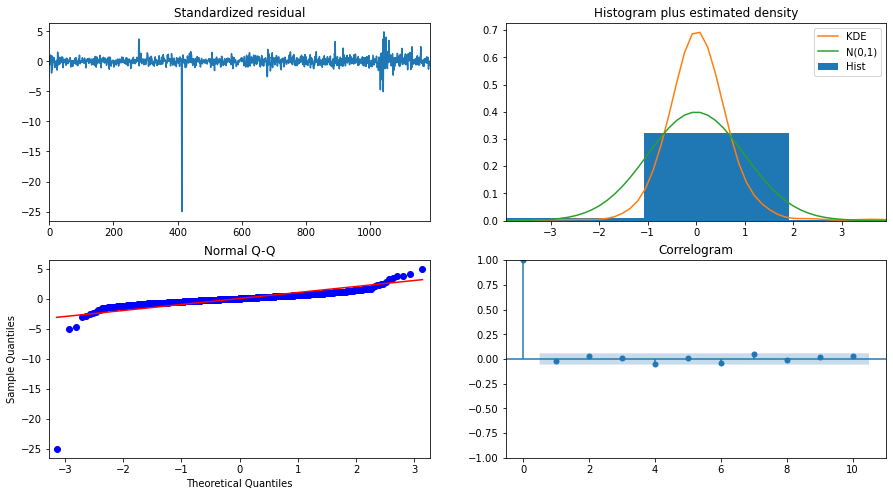

In [18]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Top left: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

Top Right: The density plot on the top right suggests a normal distribution with a mean of zero.

Bottom left: The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.

Bottom Right: The residual errors are not autocorrelated, as shown by the Correlogram, also known as the **ACF plot.** Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, you’ll need to add more Xs (predictors) to the model.

In [19]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

C:\Users\vbhak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vbhak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:          D.Close Price   No. Observations:                 1187
Model:                 ARIMA(1, 1, 2)   Log Likelihood                2563.509
Method:                       css-mle   S.D. of innovations              0.028
Date:                Sun, 26 Dec 2021   AIC                          -5117.019
Time:                        16:06:40   BIC                          -5091.623
Sample:                             1   HQIC                         -5107.447
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0006      0.001      0.745      0.456      -0.001       0.002
ar.L1.D.Close Price     0.0611      0.479      0.128      0.899      -0.878       1.001
ma.L1.D.Close Pr

In [24]:
# Forecast
fc, se, conf = fitted.forecast(133, alpha=0.05)  # 95% conf

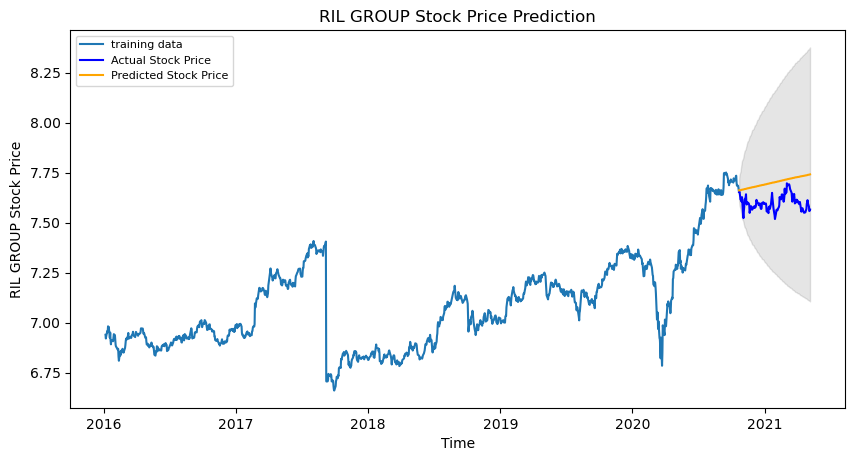

In [25]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('RIL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('RIL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [27]:
#metrics , model performance
# report performance
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.01226759728545077
MAE: 0.10279634663629708
RMSE: 0.11075918600933636
MAPE: 0.013549706817365658


With a **MAPE of around 1.3%, the model is 98.7% accurate in predicting the next 15 observations**.